# Análise de regressão do peso de espécies de peixes

O objetivo desse projeto é aplicar a biblioteca *MLR* para gerar uma análise do peso de espécies de peixes pescados. O objetivo da análise de regressão é entender como certa(s) variável(is) (independentes) explicam o comportamento de uma outra variável (dependente) por meio de parâmetros gerados pelo modelo e esses parâmetros mostram a direção e qual o poder de explicação de determinada variável. Aqui irei, primeiramente, utilizar um modelo de regressão linear simples (univariado) onde usarei apenas uma variável para o modelo, depois usarei um regressão linear multivarida (com todas as variáveis). Em ambos os casos o objetivo é um só: definir uma reta para os dados que possa dar o melhor ajuste entre as variáveis.

Para realizar a análise passarei por algumas etapas, que serão:

1) Analisar a correlação entre as variáveis;

2) Gerar o modelo;

3) Avaliar o modelo e seus resíduos.

## Importando a biblioteca *MLR*

In [1]:
pip install mlr

## Importando as bibliotecas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlr.MLR import MyLinearRegression as mlr


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Importando a base de dados

In [3]:
peixe = pd.read_csv('Fish.csv')

Primeiras linhas da base de dados.

In [4]:
peixe.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


últimas linhas da base de dados.

In [5]:
peixe.tail()

,Species,Weight,Length1,Length2,Length3,Height,Width
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672
158,Smelt,19.9,13.8,15.0,16.2,2.9322,1.8792


## Analisando a base de dados

Dimensão da base de dados.

In [6]:
peixe.shape

(159, 7)

Colunas da base de dados:

1) *Species* : Nome da espécie de peixe;

2) *Weight* : Peso do peixe em Gramas;

3) *Length1* : comprimento vertical em centímetros;
 
4) *Length2* : comprimento diagonal em centímetros;

5) *Length3* : comprimento da cruz em centímetros;

6) *Height* : altura em centímetros;

7) *Width* : largura diagonal em centímetros.

In [7]:
peixe.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

Informações sobre a base de dados: Uma das colunas é do tipo *objeto* e todas as outras são do tipo *float*.

In [8]:
peixe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


Não temos valores faltantes na base de dados.

In [9]:
peixe.isna().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

Na correlação entre as variáveis podemos ver que as variáveis *Length1*,*Length2* e *Length3* que tratam do comprimento vertical, diagonal e de cruz, respectivamente, do peixe são altamente correlacionadas com o peso dos peixes. Além disso vemos que essas variáveis são altamente correlaciondas entre si e por isso podemos ter alguns problemas no modelo de regressão.

In [10]:
peixe.corr()

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


## Análise exploratória dos dados

A maior parte dos peixes são da espécie *Perch*, *Bream* e *Roach*.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


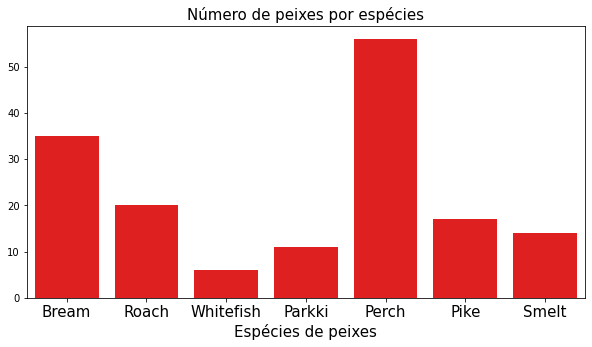

In [11]:
plt.figure(figsize=(10,5))
sns.countplot(peixe['Species'], color='red')
plt.xlabel("Espécies de peixes",size=15)
plt.title("Número de peixes por espécies",size=15)
plt.ylabel("")
plt.xticks(size=15);

As espécies de peixe com maior peso médio são o *Pike*, *Whitefish* e *Bream*.

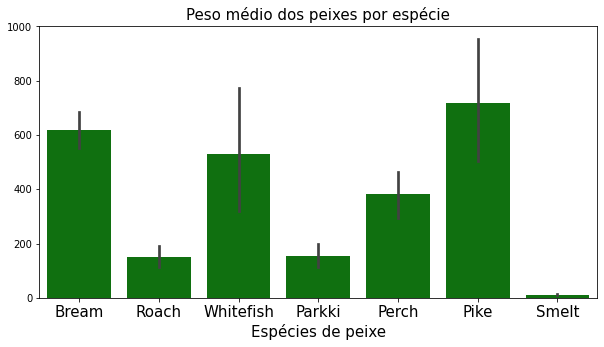

In [12]:
plt.figure(figsize=(10,5))
sns.barplot(x=peixe['Species'],y=peixe['Weight'], color='green')
plt.xlabel("Espécies de peixe",size=15)
plt.title("Peso médio dos peixes por espécie",size=15)
plt.ylabel("")
plt.xticks(size=15);

Agora irei analisar a direção da variável *Weight* em relação com as outras varipaveis.

Vemos que o peso possui uma relação quase linear com o comprimento vertival dos peixes. Destacamos que as espécies de peixes parecem estar em regiões específicas do gráfico.

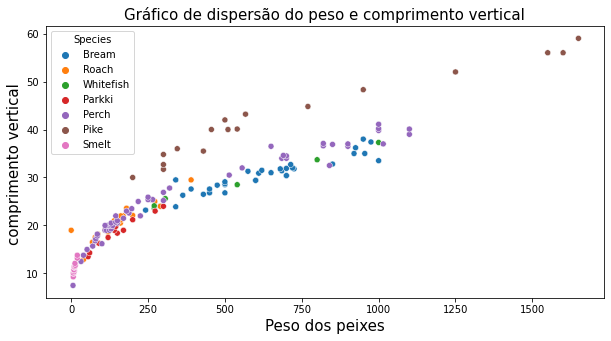

In [13]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Weight',y='Length1',data=peixe, hue='Species')
plt.title('Gráfico de dispersão do peso e comprimento vertical',size=15)
plt.xlabel("Peso dos peixes",size=15)
plt.ylabel('comprimento vertical ',size=15)
plt.show()

Assim como no comprimento vertical, o comprimento diagonal também possui praticamente idêntico.

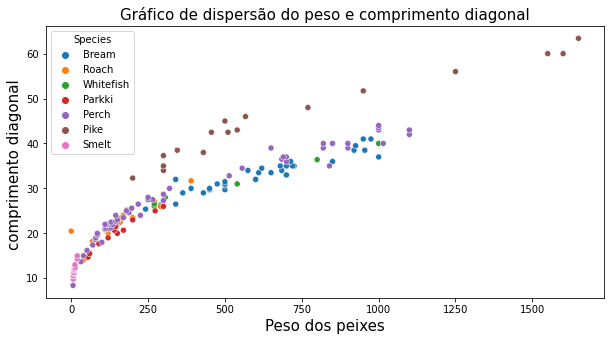

In [14]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Weight',y='Length2',data=peixe, hue='Species')
plt.title('Gráfico de dispersão do peso e comprimento diagonal',size=15)
plt.xlabel("Peso dos peixes",size=15)
plt.ylabel('comprimento diagonal ',size=15)
plt.show()

Comportamento semelhante ao das variáveis anteriores.

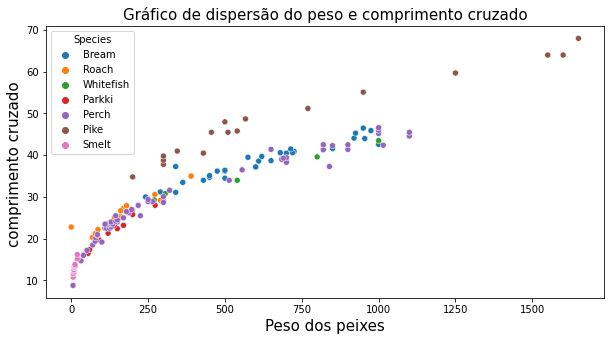

In [15]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Weight',y='Length3',data=peixe, hue='Species')
plt.title('Gráfico de dispersão do peso e comprimento cruzado',size=15)
plt.xlabel("Peso dos peixes",size=15)
plt.ylabel('comprimento cruzado ',size=15)
plt.show()

Já aqui, na variável altura o comportamento parece ser diferente para cada umas das espécies de peixe.

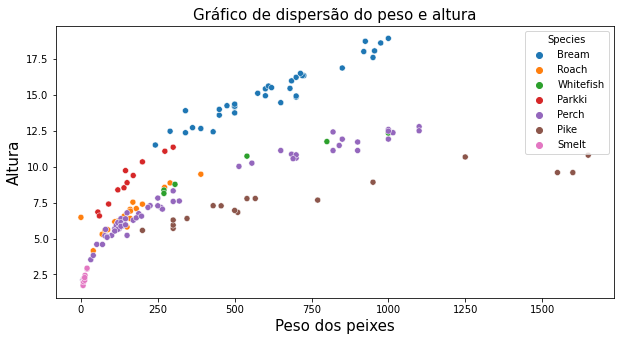

In [16]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Weight',y='Height',data=peixe, hue='Species')
plt.title('Gráfico de dispersão do peso e altura',size=15)
plt.xlabel("Peso dos peixes",size=15)
plt.ylabel('Altura',size=15)
plt.show()

Também, nesse gráfico de dispersão a variável tem um comportamento semelhante as anteriores, ou seja, quase que linear com o peso dos peixes.

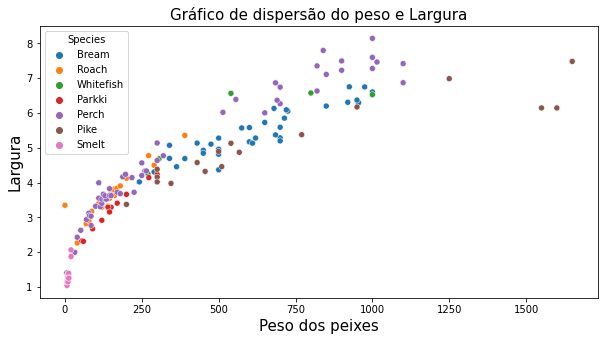

In [17]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Weight',y='Width',data=peixe, hue='Species')
plt.title('Gráfico de dispersão do peso e Largura',size=15)
plt.xlabel("Peso dos peixes",size=15)
plt.ylabel('Largura',size=15)
plt.show()

## Breve transformação dos dados

A coluna *Species* é do tipo objeto, então para a modelagem ou não usamos essa variável ou podemos tranformá-la em uma variável *dummy*, que é uma variável com valores 0 ou 1, onde 0 zero representa a ausência e o 1 a presença do valor em cada coluna.

In [18]:
peixe = pd.get_dummies(peixe, columns=['Species'],prefix=['Species'])

Visualizando novamente a base de dados pode-se notar a presença de sete novas colunas que, agora sim, podem ser usadas no modelo de regressão.

In [19]:
peixe

,Weight,Length1,Length2,Length3,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,1,0,0,0,0,0,0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,1,0,0,0,0,0,0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,1,0,0,0,0,0,0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,1,0,0,0,0,0,0
4,430.0,26.5,29.0,34.0,12.4440,5.1340,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936,0,0,0,0,0,1,0
155,13.4,11.7,12.4,13.5,2.4300,1.2690,0,0,0,0,0,1,0
156,12.2,12.1,13.0,13.8,2.2770,1.2558,0,0,0,0,0,1,0
157,19.7,13.2,14.3,15.2,2.8728,2.0672,0,0,0,0,0,1,0


Podemos até gerar novamente a correlação entre as variáveis.

In [20]:
peixe.corr()['Weight']

Weight               1.000000
Length1              0.915712
Length2              0.918618
Length3              0.923044
Height               0.724345
Width                0.886507
Species_Bream        0.326795
Species_Parkki      -0.186034
Species_Perch       -0.033240
Species_Pike         0.310641
Species_Roach       -0.261784
Species_Smelt       -0.337109
Species_Whitefish    0.073625
Name: Weight, dtype: float64

## Separando as variáveis

Irei separar as variáveis em variáveis independente e dependentes.

In [155]:
y = peixe['Weight']
X = pd.DataFrame(peixe['Length2'])

Visualizando.

In [29]:
display(y)
display(X)

0      242.0
1      290.0
2      340.0
3      363.0
4      430.0
       ...  
154     12.2
155     13.4
156     12.2
157     19.7
158     19.9
Name: Weight, Length: 159, dtype: float64

,Length2
0,25.4
1,26.3
2,26.5
3,29.0
4,29.0
...,...
154,12.2
155,12.4
156,13.0
157,14.3


## Criando o modelo

Como dito no início irei primeiro gerar um modelo univariado e nesse modelo irei usar a variável *Lenght2*, que é o comprimento da diagonal do peixe em centímetros.

Instanciando o modelo de regressão linear.

In [156]:
model = mlr()

Inserindo os dados no modelo.

In [157]:
model.ingest_data(X,y)

Treinando o modelo.

In [158]:
model.fit()

### Análise dos parâmetros do modelo

Vemos abaixo o intercepto (que seria o ponto de partida do modelo) e parâmetro da variável *Lenght2* (comprimento diagonal do peixe). A interpretação dada aos parâmetros de uma regressão linear é que a variação de uma unidade de uma das variáveis aumenta o valor médio do peso do peixe (ou diminui em caso de sinal negativo dos parâmetros).

In [159]:
print('Intercepto do modelo :',model.intercept_)
print('Parâmetro da variável Lenght2 :',model.coef_[0])

Intercepto do modelo : -473.64900740680565
Parâmetro da variável Lenght2 : 30.68637085891901


Abaixo podemos ver o intervalo de confiança de cada parâmetro do modelo.

In [160]:
model.conf_int()

,0,1
const,-536.816426,-410.481589
Length2,28.605578,32.767163


**Estatística t**

Esse resultado faz parte do teste de hipótese do parâmetro. Nesse teste de hipótese testamos se o parâmetro é estatisticamente igual a um determinado valor, ou seja,

$H_0$: $\beta_{j}=\beta_{j}^{0}$

$H_1$: $\beta_{j}\ne \beta_{j}^{0}$

Geralmente testamos se o parâmetro é estatisticamente nulo, ou seja, $\beta_{j} = 0$, nesse caso:

$H_0$: $\beta_{j}=0$

$H_1$: $\beta_{j}\ne 0$

O ideal para esse teste é que rejeitemos a hipótese nula. A regra de rejeição de $H_{0}$ é $t > t_{T-K;1 -\frac{\alpha}{2}}$ e calculamos t da seguinte forma:

$t = \frac{b_{j} - \beta_{j}^{0}}{ep(\beta_{j})}$

Como $\beta_{j}^{0} = 0$, para o intercepto, temos:

$ t= \frac{b_{j}}{ep(b_{j})} = \frac{-473.64900740680565}{31.98044003750429} = -14.810584433839582$

Para o parâmetro de *Lenght2*:

$ t= \frac{b_{j}}{ep(b_{j})} = \frac{30.68637085891901}{1.0534649555717872} = 29.128990667053838$


Para o nosso exemplo e conforme a tabela t-student encontrada [aqui](https://edisciplinas.usp.br/pluginfile.php/1786946/mod_resource/content/1/Tabelat-student.pdf) os nossos limites da região de aceitação são -2.009 e +2.009 (mais de 50 graus de liberdade e nível de significância de 0,025%, por ser um teste bilateral) e para o teste **z** = -1,96 ou +1,96. Como o resultado excede esses limites da região de aceitação da hipótese nula, rejeitamos $H_{0}$.

Abaixo os resultados extrapolam os valores de -2.009 e +2.009, então rejeitamos $H_0$ e os parâmetros são estatisticamente significativos.

In [57]:
print('t-valor da constante ou intercepto :',model.tvalues()[0])
print('t-valor do parâmetro de Lenght2 :',model.tvalues()[1])

t-valor da constante ou intercepto : -14.810584433839582
t-valor do parâmetro de Lenght2 : 29.128990667053838


Erros-padros dos parâmetros que são usados para gerar o **t-teste**.

In [56]:
print('Erro padrão da constante ou intercepto :',model.std_err()[0])
print('Erro padrão do parâmetro de Lenght2 :',model.std_err()[1])

Erro padrão da constante ou intercepto : 31.98044003750429
Erro padrão do parâmetro de Lenght2 : 1.0534649555717872


O *p-value* ou *p*-valor é uma outra forma de ver a significância dos parâmetros: se esse valor for menor que 5%, rejeitamos a hipótese que os parâmetros são estatisticamente insignificantes ou igual a zero. No nosso caso esse valores estão muito abaixo desse valor de 5%, então eles são significantes.

In [52]:
print('P-valor da constante ou intercepto :',model.pvalues()[0])
print('P-valor do parâmetro de Lenght2 :',model.pvalues()[1])

P-valor da constante ou intercepto : 1.2955035596622344e-31
P-valor do parâmetro de Lenght2 : 3.3951132290327732e-65


Matriz de correlação do modelo.

In [58]:
model.corrcoef()

1.0

Matriz de covariância do modelo.


In [59]:
model.covar()

array(114.83968792)

### Métricas do modelo

1) **SSE** (que é a soma dos quadrados do erro): O erro é a diferença entre o valor observado e o valor previsto, seria a variação que o modelo não consegue explicar;

2) **SST** (soma do quadrado totais): É a soma das diferenças entre o valor previsto e a média da variável dependente.

3)**MSE** (Erro quadrado médio): Métrica de erro mais usada.



4) $R^2$ (*R* quadrado ou **coeficiente de determinação**): É o quanto a variável independente consegue explicar a variação da variável dependente, esse resultado é encontrado com a seguinte fórmula: $R^2 = 1 - \frac{SSE}{SST}$

Ainda sobre o R²:

**a)** O R² é um métrica que varia de 0 a 1, se o modelo tiver intercepto.

**b)** A princípio, quanto maior o R² melhor é o modelo de regressão, ou seja, maior a capacidade de explicação do modelo. 

**c)** O $R^2$ é não descrescente quanto ao número de regressores, ou seja, se adicionarmos mais variáveis ao modelo o R² nunca diminuirá.

**d)** O $R^2$ é o ceficiente de correlação linear entre y e y predito.

**e)** Como $R^2$ mede a proporção da variação da resposta em torno de sua média amostral que pode ser explicada
usando o modelo de regressão ao invés do modelo simples.

**f)** Caso o modelo de regressão de não tenha intercepto, então não é possível garantir que o $R^2$ varie entre 0 e 1. Nesse caso, usa-se o $R^2$ não centrado.


5) **$R^2$ ajustado** (*R* quadrado ajustado): é uma outra métrica que iferente do $R^2$, o $R^2$ ajustado não sofre a limitação de nunca decair. Caso seja inserido um modelo de regressão uma variável que não seja importante o $R^2$ ajustado irá diminuir. Uma característica do $R^2$ ajustado é que ele pode ser negativo e por isso ele não pode ser interpretado como uma proporção. No nosso exemplo o $R^2$ ajustado caiu um pouco, porém nada significante em comparação com o $R^2$.

A fórmula do $R^2$ ajustado é dada por: $1 - \frac{n-1}{(n-1)k}(1 - R^2)$, onde $k$ é o número de parâmetros.

6) **AIC e BIC**: Mais acima nós afirmamos que o $R^2$ ajustado serve para compararmos diferentes modelos, porém existem estatísticas melhores para fazermos essa comparação. Entres elas são: **AIC (Akaike information criterion)** e **BIC (Bayesian information criterion)**. Ambos são critérios de informação e possuem uma fundamentação estatística e matemática mais rigorosa do que o $R^2$ ajustado.

Abaixo geramos as métricas do modelo.


In [28]:
model.print_metrics()

sse:     3161469.0097
sst:     20247459.0691
mse:     19883.4529
r^2:     0.8439
adj_r^2: 0.8429
AIC:     2028.9477
BIC:     2035.0855


O *F-statistic* é uma estatística do teste seguinte teste de hipótese:

$H_0$: $\beta_1=\beta_2 =\beta_3 = \beta_4= ... =\beta_k =0$ (não há relação de regressão (linear) entre a resposta e os regressores)

$H_1$: não $H_0$ (Pelo menos uma das inclinações é diferente de zero)

O que esse teste de hipótese teste é se os coeficientes são conjuntamente nulos e para esse teste deve-se **rejeitar** a hipótese nula e para rejeitar a hipótese nula precisamos que o valor da estatística gerado no modelo esteja fora da região de aceitação de $H_0$. Esse teste é conhecido como o **teste F**.

A regra de rejeição é que $F > F_{K-1;T-K;1-\alpha}$

Abaixo o teste apresentou um resultado muito baixo (a 5% de nível de significância), com isso podemos concluir rejeitando $H_0$ e os parâmetros/coeficientes são conjuntamente significativos.

In [44]:
print('Estatística do teste F :',model.ftest()[0])
print('p-valor do teste F :', model.ftest()[1])

Estatística do teste F : 848.4980972813104
p-valor do teste F : 3.3951132290325792e-65


### Análise dos resíduos

Nos resíduos do modelo podemos notar que há um comportamento não linear, pois o ideal é que os dados estejam em torno da linha que está no valor 0, ou seja, um ruído branco; os erros devem se comportar distribuídos normalmente com média zero e variância constante. Isso significa que há alguma(s) variável(is) que falta(m) no modelo.

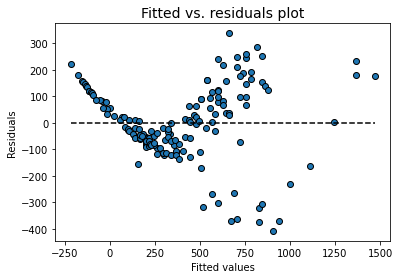

In [61]:
model.fitted_vs_residual()

A distribuição dos resíduos não se assemelha a uma distribuição normal, pode-se ver isso pelo histograma que não há um formato de *sino* na distribuição, que configura uam distribuição normal.

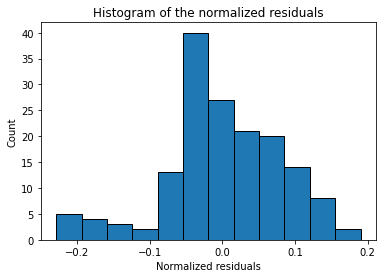

In [62]:
model.histogram_resid()

E o gráfico *QQpolt*, onde todos os *quantis* dos resíduos devem estar em cima da linha vermelha, porém isso não ocorre.

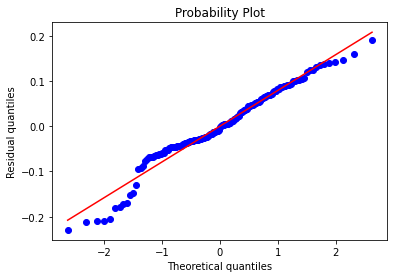

In [63]:
model.qqplot_resid()

Dado a análise dos resíduos esse modelo não é um modelo ideal, por isso irei construir um novo modelo

## Criando o modelo 2

Agora criarei um modelo multivariado e as variáveis explicativas serão *Length2*, *Height* e *Width*.

In [65]:
y2 = peixe['Weight']
X2 = peixe[['Length2','Height','Width']]

Instanciando, inserindo e treinando o modelo

In [67]:
model2 = mlr()
model2.ingest_data(X2,y2)
model2.fit()

### Análise dos parâmetros do modelo 2

Parâmetros do modelo.

In [68]:
print('Intercepto do modelo :',model2.intercept_)
print('Parâmetro da variável Lenght2 :',model2.coef_[0])
print('Parâmetro da variável Height :',model2.coef_[1])
print('Parâmetro da variável Width :',model2.coef_[2])

Intercepto do modelo : -517.3058304969841
Parâmetro da variável Lenght2 : 21.4217664438438
Parâmetro da variável Height : 12.350217608704611
Parâmetro da variável Widht : 44.39709702045229


Intervalo de confiança dos parâmetros.

In [69]:
model2.conf_int()

,0,1
const,-574.099098,-460.512563
Length2,17.614613,25.228920
Height,4.747220,19.953215
Width,13.895744,74.898450


Estatísticas **t** de cada parâmetro do modelo. Pela tabela de *t-student* com 155 graus de liberdade e nível de significância de 5%, os valores das estatísticas *t* extrapolam os limites (-2.009 e +2.009) e assim rejeitamos a hipótese nula que os parâmetros são estatisticamente insignificantes.

In [70]:
print('t-valor da constante ou intercepto :',model.tvalues()[0])
print('t-valor do parâmetro de Lenght2 :',model.tvalues()[1])
print('t-valor do parâmetro de Height :',model.tvalues()[2])
print('t-valor do parâmetro de Width :',model.tvalues()[3])

t-valor da constante ou intercepto : -17.992964969307884
t-valor do parâmetro de Lenght2 : 11.114940550230495
t-valor do parâmetro de Height : 3.208795068756836
t-valor do parâmetro de Width : 2.87532993690459


Erros-padrão dos parâmetros do modelo.

In [71]:
print('Erro padrão da constante ou intercepto :',model.std_err()[0])
print('Erro padrão do parâmetro de Lenght2 :',model.std_err()[1])
print('Erro padrão do parâmetro de Height :',model.std_err()[2])
print('Erro padrão do parâmetro de Width :',model.std_err()[3])

Erro padrão da constante ou intercepto : 28.750449488418905
Erro padrão do parâmetro de Lenght2 : 1.92729473873787
Erro padrão do parâmetro de Height : 3.848864556342556
Erro padrão do parâmetro de Width : 15.440696544288711


Os *p-valores* dos parâmetros do modelo ficaram abaixo de 5%, então todos são estatisticamente significantes (ou diferente de zero).

In [72]:
print('P-valor da constante ou intercepto :',model.pvalues()[0])
print('P-valor do parâmetro de Lenght2 :',model.pvalues()[1])
print('P-valor do parâmetro de Height :',model.pvalues()[2])
print('P-valor do parâmetro de Width :',model.pvalues()[3])

P-valor da constante ou intercepto : 8.554818061919706e-40
P-valor do parâmetro de Lenght2 : 1.781955790439655e-21
P-valor do parâmetro de Height : 0.0016200018172241616
P-valor do parâmetro de Width : 0.004604075887145552


Matriz de correlação.

In [73]:
model2.corrcoef()

array([[1.        , 0.6404408 , 0.87354668],
       [0.6404408 , 1.        , 0.79288102],
       [0.87354668, 0.79288102, 1.        ]])

Matriz de covariância.

In [74]:
model2.covar()

array([[114.83968792,  29.41698763,  15.78116877],
       [ 29.41698763,  18.37157576,   5.72912464],
       [ 15.78116877,   5.72912464,   2.84193469]])

### Métricas do modelo

Em relação ao modelo anterior:


1) O **SSE** caiu, mostrando que houve um aumento no poder explicativo de modelo, dado que o valor de **SST** se manteve. Podemos ver isso também no aumento do $R^2$ (subiu de 0.8439 para 0.8815) e do $R^2$ ajustado (que subiu de 0.8429 para 0.8793).

2) A métrica de erro *MSE* caiu;

3) A métricas **AIC** e **BIC** também caíram, mostram que esse modelo é melhor que o anterior.

In [75]:
model2.print_metrics()

sse:     2398389.8969
sst:     20247459.0691
mse:     15084.2132
r^2:     0.8815
adj_r^2: 0.8793
AIC:     1989.0257
BIC:     2001.3013


O *p-valor* da estatística do teste *F* mostrou-se muito abaixo de 5%, que mostra que os parâmetros conjuntamente significativos.

In [77]:
print('Estatística do teste F :',model.ftest()[0])
print('p-valor do teste F :', model.ftest()[1])

Estatística do teste F : 384.50875248805426
p-valor do teste F : 1.4868236310594435e-71


### Análise dos resíduos

Assim como o modelo anterior, os erros apresentam um comportamento diferente do ideal (com uma distribuição normal).

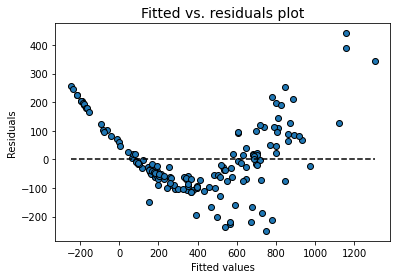

In [78]:
model2.fitted_vs_residual()

O histograma dos resíduos não aparenta ser de forma de *sino*, mas possui um formato melhor do que o histograma do modelo anterior.

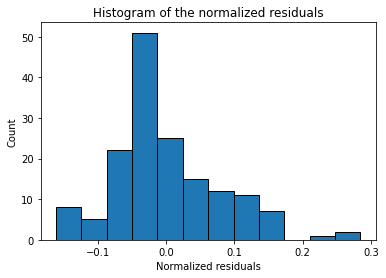

In [79]:
model2.histogram_resid()

Por fim, no *QQplot* os quantis dos resíduos estão mais alinhados com a reta vermelho do que o modelo anterior.

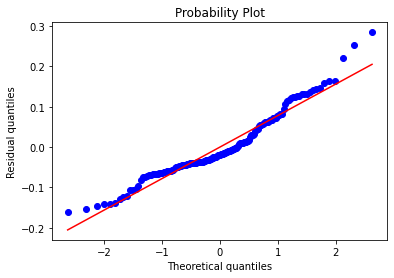

In [80]:
model2.qqplot_resid()

Como esse modelo ainda não trouxe um resultado satisfatório, gerarei outro modelo.

## Criando o modelo 3

Aqui irei inserir algumas variáveis *dummies* no modelo para averiguar se há alguma melhora no mesmo.

In [279]:
y3 = peixe['Weight']
X3 = peixe[['Length1', 'Length2', 'Species_Parkki', 'Species_Pike', 'Species_Smelt']]

Instanciando, inserindo dados e treinando o modelo.

In [281]:
model3 = mlr()
model3.ingest_data(X3,y3)
model3.fit()

### Análise dos parâmetros do modelo 3

Parâmetro de cada variável.

In [291]:
print('Intercepto do modelo :',model3.intercept_)
print('Parâmetro da variável Lenght1 :',model3.coef_[0])
print('Parâmetro da variável Lenght2 :',model3.coef_[1])
print('Parâmetro da variável Species_Parkki :',model3.coef_[2])
print('Parâmetro da variável Species_Pike :',model3.coef_[3])
print('Parâmetro da variável Species_Smelt :',model3.coef_[4])

Intercepto do modelo : -770.904781424374
Parâmetro da variável Lenght1 : -76.21285602584442
Parâmetro da variável Lenght2 : 111.73068800072406
Parâmetro da variável Species_Parkki : 79.77026931165607
Parâmetro da variável Species_Pike : -354.9107848050803
Parâmetro da variável Species_Smelt : 308.03294444937256


Intervalo de Confiança dos parâmetros.

In [292]:
model3.conf_int()

,0,1
const,-832.875902,-708.933661
Length1,-132.922320,-19.503392
Length2,58.813131,164.648245
Species_Parkki,19.547042,139.993497
Species_Pike,-417.213209,-292.608361
Species_Smelt,240.858799,375.207090


Todos os valores do teste **t** apresentaram valores que extrapolam os limites de -2.009 e +2.009 para o teste de hipótese de significância dos parâmetros e conclui-se que todos os parâmetros são estatisticamente significantes.

In [295]:
print('t-valor da constante ou intercepto :',model3.tvalues()[0])
print('t-valor do parâmetro de Lenght1 :',model3.tvalues()[1])
print('t-valor do parâmetro de Lenght2 :',model3.tvalues()[2])
print('t-valor do parâmetro de Species_Parkki :',model3.tvalues()[3])
print('t-valor do parâmetro de Species_Pike :',model3.tvalues()[4])
print('t-valor do parâmetro de Species_Smelt :',model3.tvalues()[5])

t-valor da constante ou intercepto : -24.57583493229806
t-valor do parâmetro de Lenght1 : -2.6550309173133106
t-valor do parâmetro de Lenght2 : 4.171282214887865
t-valor do parâmetro de Species_Parkki : 2.616820410330047
t-valor do parâmetro de Species_Pike : -11.254109568426964
t-valor do parâmetro de Species_Smelt : 9.059242957573215


Erros-padrão dos parâmetros.

In [297]:
print('Erro padrão da constante ou intercepto :',model3.std_err()[0])
print('Erro padrão do parâmetro de Lenght1 :',model3.std_err()[1])
print('Erro padrão do parâmetro de Lenght2 :',model3.std_err()[2])
print('Erro padrão do parâmetro de Species_Parkki :',model3.std_err()[3])
print('Erro padrão do parâmetro de Species_Pike :',model3.std_err()[4])
print('Erro padrão do parâmetro de Species_Smelt :',model3.std_err()[5])

Erro padrão da constante ou intercepto : 31.36840654846312
Erro padrão do parâmetro de Lenght1 : 28.705072897253093
Erro padrão do parâmetro de Lenght2 : 26.785693761508657
Erro padrão do parâmetro de Species_Parkki : 30.48366215608914
Erro padrão do parâmetro de Species_Pike : 31.53610533531049
Erro padrão do parâmetro de Species_Smelt : 34.00206241205933


Todos os *p-valores* estão abaixo de 5%, ratificando a significância dos parâmetros.

In [299]:
print('P-valor da constante ou intercepto :',model3.pvalues()[0])
print('P-valor do parâmetro de Lenght1 :',model3.pvalues()[1])
print('P-valor do parâmetro de Lenght2 :',model3.pvalues()[2])
print('P-valor do parâmetro de Species_Parkki :',model3.pvalues()[3])
print('P-valor do parâmetro de Species_Pike :',model3.pvalues()[4])
print('P-valor do parâmetro de Species_Smelt :',model3.pvalues()[5])

P-valor da constante ou intercepto : 5.451458100122571e-55
P-valor do parâmetro de Lenght1 : 0.008769284532355709
P-valor do parâmetro de Lenght2 : 5.058418254153982e-05
P-valor do parâmetro de Species_Parkki : 0.009765629857826526
P-valor do parâmetro de Species_Pike : 8.706253982769625e-22
P-valor do parâmetro de Species_Smelt : 5.816193839201904e-16


Matriz de correlação.

In [300]:
model3.corrcoef()

array([[ 1.        ,  0.99951727, -0.20573206,  0.56351399, -0.46741972],
       [ 0.99951727,  1.        , -0.20595745,  0.55277968, -0.47977519],
       [-0.20573206, -0.20595745,  1.        , -0.09432912, -0.08471211],
       [ 0.56351399,  0.55277968, -0.09432912,  1.        , -0.10751283],
       [-0.46741972, -0.47977519, -0.08471211, -0.10751283,  1.        ]])

Matriz de covariância.

In [301]:
model3.covar()

array([[ 9.99288369e+01,  1.07073431e+02, -5.23537139e-01,
         1.74619059e+00, -1.32823024e+00],
       [ 1.07073431e+02,  1.14839688e+02, -5.61854152e-01,
         1.83628294e+00, -1.46151978e+00],
       [-5.23537139e-01, -5.61854152e-01,  6.48037577e-02,
        -7.44367487e-03, -6.13008518e-03],
       [ 1.74619059e+00,  1.83628294e+00, -7.44367487e-03,
         9.60910756e-02, -9.47376801e-03],
       [-1.32823024e+00, -1.46151978e+00, -6.13008518e-03,
        -9.47376801e-03,  8.08056683e-02]])

### Métricas do modelo

Em comparação ao modelo anterior houve melhorias, como:

1) Com a inserção das *dummies* houve uma queda em mais da metade do **SSE**, mostrando que o poder explicativo de modelo subiu bastante; e isso pode ser visto no $R^2$ que subiu de 0.8815 para 0.9352 e do $R^2$ ajustado que subiu de 0.8793 para 0.9331;

2) A métrica *MSE* caiu quase pela metade, mostrand que o modelo está mais preciso;

3) Por fim, as métricas **AIC** e **BIC** caíram, mostrando que o atual modelo é melhor que o primeiro e segundo modelo.

In [282]:
model3.print_metrics()

sse:     1311722.3033
sst:     20247459.0691
mse:     8249.8258
r^2:     0.9352
adj_r^2: 0.9331
AIC:     1897.0761
BIC:     1915.4895


### Análise dos resíduos do modelo 3

No gráfico abaixo podemos ver que os resíduos estão mais acima da linha 0, mostrando que estão um pouco mais comportados, porém ainda não estão na forma ideal.

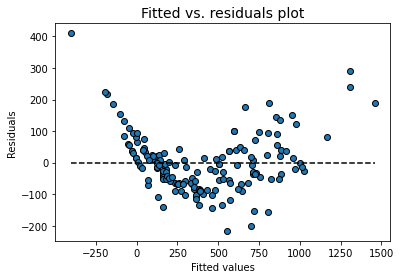

In [283]:
model3.fitted_vs_residual()

O histograma aparenta ter um formato de *sino*, porém não aparenta ser muito simétrico.

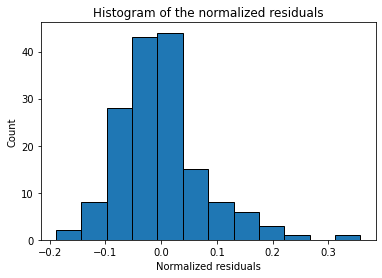

In [284]:
model3.histogram_resid()

Em relação aos modelos anteriores, no *QQplot* os quantis estão mais alinhados na reta vermelha.

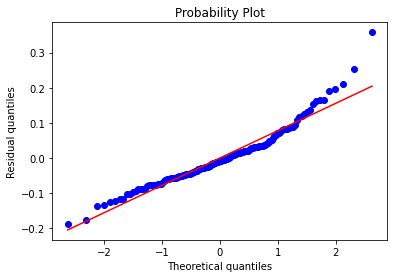

In [285]:
model3.qqplot_resid()

## Conclusão

Esse projeto teve com finalidade a aplicação desse biblioteca para análise de regressão. Achei uma biblioteca interessante, pois gera as principais ferramentas de análise de regressão linear (testes estatísticos e gráficos de resíduos). Futuramente irei procurar e aplicar outras bibliotecas que possuam a mesma funcionalidade explorar suas ferramentas de análise.